In [2]:
import pandas as pd
import os

In [3]:
path="drive/MyDrive/ProductPdn/train.csv"

In [4]:
DATASET_FOLDER = '../dataset/'
train = pd.read_csv(path)
# test = pd.read_csv(os.path.join(DATASET_FOLDER, 'test.csv'))

In [5]:
(train.head())
train.isnull().sum()

,0
sample_id,0
catalog_content,0
image_link,0
price,0


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
train['catalog_content'][10]

"Item Name: Braswell's Key Lime Marinade for Sole 12oz\nBullet Point: Key Lime Marinade for sole. Very light but with a solid taste!\nProduct Description: Key Lime Marinade for sole. Very light but with a solid taste!\nValue: 12.0\nUnit: Ounce\n"

In [8]:
import re

In [9]:
# Function to extract key-value pairs from catalog_content
def parse_catalog_content(text):
    """
    Parse text like:
    "Item Name: X\nBullet Point: Y\nProduct Description: Z\nValue: 12.0\nUnit: Ounce"
    into a dict.
    """
    result = {}
    if pd.isna(text):
        return result

    # Split by newline
    lines = str(text).split("\n")

    for line in lines:
        # Match "Key: Value" pattern
        match = re.match(r"^([^:]+):\s*(.*)$", line.strip())
        if match:
            key = match.group(1).strip()
            value = match.group(2).strip()
            result[key] = value

    return result

# Apply parser to each row
parsed = train['catalog_content'].apply(parse_catalog_content)

# Create new DataFrame from parsed dicts
parsed_df = pd.DataFrame(parsed.tolist())

# Combine with unique id and price
reg_df = pd.concat([train[['sample_id', 'price']], parsed_df], axis=1)



print("✅ Parsed DataFrame created successfully!")
(reg_df.head())

✅ Parsed DataFrame created successfully!


,sample_id,price,Item Name,Value,Unit,Bullet Point 1,Bullet Point 2,Bullet Point 3,Bullet Point 4,Bullet Point 5,...,Bullet Point 21,Bullet Point 22,Bullet Point 23,Bullet Point 24,Bullet Point 25,Bullet Point 26,Product Description 3,Product Description 4,Item Name 1,Item Name 2
0,33127,4.89,"La Victoria Green Taco Sauce Mild, 12 Ounce (P...",72.0,Fl Oz,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,198967,13.12,"Salerno Cookies, The Original Butter Cookies, ...",32.0,Ounce,Original Butter Cookies: Classic butter cookie...,Variety Pack: Includes 4 boxes with 32 cookies...,Occasion Perfect: Delicious cookies for birthd...,Shareable Treats: Fun to give and enjoy with f...,Salerno Brand: Trusted brand of delicious butt...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,261251,1.97,"Bear Creek Hearty Soup Bowl, Creamy Chicken wi...",11.4,Ounce,Loaded with hearty long grain wild rice and ve...,Full of hearty goodness,Single serve bowls,Easy to prepare mix,0 grams trans fat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55858,30.34,Judee’s Blue Cheese Powder 11.25 oz - Gluten-F...,11.25,Ounce,"Add to your favorite appetizers, dips & spread...","Sprinkle over french fries, fried chicken, mas...",Made in a dedicated gluten-free facility and s...,"Ingredients: Blue Cheese (Milk, Salt, Cultures...","Since 2009, Judee’s has been dedicated to prov...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,292686,66.49,"kedem Sherry Cooking Wine, 12.7 Ounce - 12 per...",12.0,Count,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
reg_df.isnull().sum()

,0
sample_id,0
price,0
Item Name,7
Value,0
Unit,0
Bullet Point 1,20524
Bullet Point 2,20524
Bullet Point 3,22417
Bullet Point 4,26867
Bullet Point 5,33548


In [11]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sample_id              75000 non-null  int64  
 1   price                  75000 non-null  float64
 2   Item Name              74993 non-null  object 
 3   Value                  75000 non-null  object 
 4   Unit                   75000 non-null  object 
 5   Bullet Point 1         54476 non-null  object 
 6   Bullet Point 2         54476 non-null  object 
 7   Bullet Point 3         52583 non-null  object 
 8   Bullet Point 4         48133 non-null  object 
 9   Bullet Point 5         41452 non-null  object 
 10  Product Description    32533 non-null  object 
 11  Bullet Point           6247 non-null   object 
 12  Bullet Point 6         5521 non-null   object 
 13  Bullet Point 7         2249 non-null   object 
 14  Bullet Point 8         1185 non-null   object 
 15  Bu

In [12]:
# Keep main attributes and first few bullet points
keep_cols = [
    'sample_id', 'price',
    'Item Name', 'Value', 'Unit',
    'Bullet Point 1', 'Bullet Point 2', 'Bullet Point 3', 'Bullet Point 4', 'Bullet Point 5',
    'Product Description'
]

clean_df = reg_df[keep_cols].copy()

In [13]:
bullet_cols = [f'Bullet Point {i}' for i in range(1, 6) if f'Bullet Point {i}' in clean_df.columns]
clean_df['Bullet Points'] = clean_df[bullet_cols].fillna('').agg(' '.join, axis=1)

In [14]:
clean_df['full_text'] = (
    clean_df['Item Name'].fillna('') + ' ' +
    clean_df['Bullet Points'].fillna('') + ' ' +
    clean_df['Product Description'].fillna('')
)

In [15]:
clean_df['Value'] = pd.to_numeric(clean_df['Value'], errors='coerce').fillna(0)

In [16]:
final_reg_df = clean_df[['sample_id', 'price', 'Value', 'Unit', 'full_text']]

In [17]:
final_reg_df.head()

,sample_id,price,Value,Unit,full_text
0,33127,4.89,72.00,Fl Oz,"La Victoria Green Taco Sauce Mild, 12 Ounce (P..."
1,198967,13.12,32.00,Ounce,"Salerno Cookies, The Original Butter Cookies, ..."
2,261251,1.97,11.40,Ounce,"Bear Creek Hearty Soup Bowl, Creamy Chicken wi..."
3,55858,30.34,11.25,Ounce,Judee’s Blue Cheese Powder 11.25 oz - Gluten-F...
4,292686,66.49,12.00,Count,"kedem Sherry Cooking Wine, 12.7 Ounce - 12 per..."


In [18]:
final_reg_df.isnull().sum()
final_reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  75000 non-null  int64  
 1   price      75000 non-null  float64
 2   Value      75000 non-null  float64
 3   Unit       75000 non-null  object 
 4   full_text  75000 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 2.9+ MB


In [19]:
final_reg_df['Unit'].unique()

array(['Fl Oz', 'Ounce', 'Count', 'ounce', 'None', 'Fluid Ounce', 'count',
       'oz', 'Ounces', 'pound', 'fl oz', 'gram', 'grams', 'COUNT',
       'FL Oz', 'lb', 'Each', 'Liters', 'gramm', 'ct', 'Pound', 'Oz',
       'OZ', 'millilitre', 'Jar', 'ounces', 'Fl. Oz', 'bottle', 'Bottle',
       'Gram', 'Can', 'Tea Bags', 'Fl oz', 'each', '24', 'Pack', 'Piece',
       'fluid ounces', 'gr', 'milliliter', 'mililitro', 'CT', 'FL OZ',
       'pack', 'pounds', 'kg', 'Bag', 'in', 'fl. oz.', 'K-Cups',
       'fluid ounce', 'sq ft', '-', 'ml', 'Packs', 'box', '8', 'Fl Ounce',
       'Pouch', 'Bucket', 'LB', 'per Box', 'Per Package',
       'fluid ounce(s)', 'units', 'packs', 'BOX/12', '1', 'Fluid Ounces',
       'product_weight', 'Sq Ft', 'per Carton', 'Foot', 'Grams(gm)',
       'Box', 'unità', 'Paper Cupcake Liners', 'capsule', 'bottles',
       'bag', '', '---', 'Fl.oz', 'Pounds', 'Ziplock bags', 'Fluid ounce',
       'ltr', 'PACK', 'can', 'Carton', 'Tea bags', '7,2 oz'], dtype=object)

In [20]:
import pandas as pd
import numpy as np

# Define your normalization mapping
unit_mapping = {
    # weight / volume (imperial)
    'oz': 'oz', 'OZ': 'oz', 'Ounce': 'oz', 'Ounces': 'oz', 'ounce': 'oz',
    'Fl Oz': 'oz', 'Fl. Oz': 'oz', 'Fl oz': 'oz', 'fl oz': 'oz', 'FL Oz': 'oz',
    'FL OZ': 'oz', 'Fl.oz': 'oz', 'Fluid Ounce': 'oz', 'Fluid Ounces': 'oz',
    'fluid ounce': 'oz', 'fluid ounces': 'oz', 'fluid ounce(s)': 'oz',
    '7,2 oz': 'oz',

    # weight (metric)
    'gram': 'g', 'grams': 'g', 'Gram': 'g', 'gramm': 'g', 'Grams(gm)': 'g', 'gr': 'g',

    # pounds
    'lb': 'lb', 'pound': 'lb', 'Pound': 'lb', 'pounds': 'lb', 'LB': 'lb', 'Pounds': 'lb',

    # volume (metric)
    'ml': 'ml', 'milliliter': 'ml', 'millilitre': 'ml', 'mililitro': 'ml',
    'L': 'L', 'ltr': 'L', 'Liters': 'L',

    # count / pieces
    'count': 'count', 'Count': 'count', 'COUNT': 'count', 'ct': 'count',
    'CT': 'count', 'Each': 'count', 'Piece': 'count', 'unità': 'count', 'units': 'count',

    # packaging
    'Pack': 'pack', 'pack': 'pack', 'Packs': 'pack', 'PACK': 'pack',
    'per Box': 'pack', 'per Carton': 'pack', 'Box': 'pack', 'BOX/12': 'pack',
    'Carton': 'pack', 'bag': 'pack', 'Bag': 'pack', 'bottles': 'pack', 'Bottle': 'pack',
    'bottle': 'pack', 'Can': 'pack', 'Jar': 'pack', 'Pouch': 'pack', 'Bucket': 'pack',

    # area/length
    'sq ft': 'sqft', 'Sq Ft': 'sqft', 'Foot': 'ft', 'in': 'inch',

    # miscellaneous / missing
    '-': 'missing', '---': 'missing', '': 'missing', 'None': 'missing',
    '1': 'missing', '24': 'missing', '8': 'missing', 'product_weight': 'missing',
    'Paper Cupcake Liners': 'missing', 'Tea Bags': 'missing', 'Tea bags': 'missing',
    'K-Cups': 'missing', 'Ziplock bags': 'missing', 'Per Package': 'missing',
    'per Package': 'missing'
}

# Normalize units
final_reg_df['Unit_normalized'] = final_reg_df['Unit'].replace(unit_mapping)

# Fill unknowns as 'other'
final_reg_df['Unit_normalized'] = final_reg_df['Unit_normalized'].fillna('other')

# Optional: inspect distribution
print(final_reg_df['Unit_normalized'].value_counts().head(20))

Unit_normalized
oz          55272
count       18275
missing       959
lb            240
Oz             78
g              51
pack           46
ml             15
each           14
ounces         14
packs          11
L               8
kg              6
sqft            2
ft              2
inch            1
fl. oz.         1
box             1
Fl Ounce        1
capsule         1
Name: count, dtype: int64


/tmp/ipython-input-4226267492.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_reg_df['Unit_normalized'] = final_reg_df['Unit'].replace(unit_mapping)
/tmp/ipython-input-4226267492.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_reg_df['Unit_normalized'] = final_reg_df['Unit_normalized'].fillna('other')


In [21]:
def convert_to_standard_unit(value, unit):
    try:
        val = float(str(value).replace(',', '').strip())
    except:
        return np.nan

    if unit == 'g':  # already in grams
        return val
    elif unit == 'oz':  # ounces to grams
        return val * 28.3495
    elif unit == 'lb':  # pounds to grams
        return val * 453.592
    elif unit == 'ml':  # already in milliliters
        return val
    elif unit == 'L':  # liters to milliliters
        return val * 1000
    elif unit == 'count':  # count type (discrete items)
        return val
    else:
        return np.nan  # missing, text, or unknown units

# Apply conversion logic
final_reg_df['Value_converted'] = final_reg_df.apply(lambda x: convert_to_standard_unit(x['Value'], x['Unit_normalized']), axis=1)

# Optional: detect type category
def detect_unit_type(unit):
    if unit in ['g', 'oz', 'lb']:
        return 'weight'
    elif unit in ['ml', 'L']:
        return 'volume'
    elif unit == 'count':
        return 'count'
    else:
        return 'other'

final_reg_df['Unit_type'] = final_reg_df['Unit_normalized'].apply(detect_unit_type)

# Inspect conversion results
print(final_reg_df[['Value', 'Unit', 'Unit_normalized', 'Value_converted', 'Unit_type']].head(20))

     Value   Unit Unit_normalized  Value_converted Unit_type
0    72.00  Fl Oz              oz      2041.164000    weight
1    32.00  Ounce              oz       907.184000    weight
2    11.40  Ounce              oz       323.184300    weight
3    11.25  Ounce              oz       318.931875    weight
4    12.00  Count           count        12.000000     count
5     6.25  ounce              oz       177.184375    weight
6   180.00  Ounce              oz      5102.910000    weight
7     1.00  Count           count         1.000000     count
8   192.00  Fl Oz              oz      5443.104000    weight
9     9.00  Ounce              oz       255.145500    weight
10   12.00  Ounce              oz       340.194000    weight
11  160.00  Ounce              oz      4535.920000    weight
12    4.00  Count           count         4.000000     count
13  192.00  Fl Oz              oz      5443.104000    weight
14  336.00  Fl Oz              oz      9525.432000    weight
15  102.00  Fl Oz       

/tmp/ipython-input-461912234.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_reg_df['Value_converted'] = final_reg_df.apply(lambda x: convert_to_standard_unit(x['Value'], x['Unit_normalized']), axis=1)
/tmp/ipython-input-461912234.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_reg_df['Unit_type'] = final_reg_df['Unit_normalized'].apply(detect_unit_type)


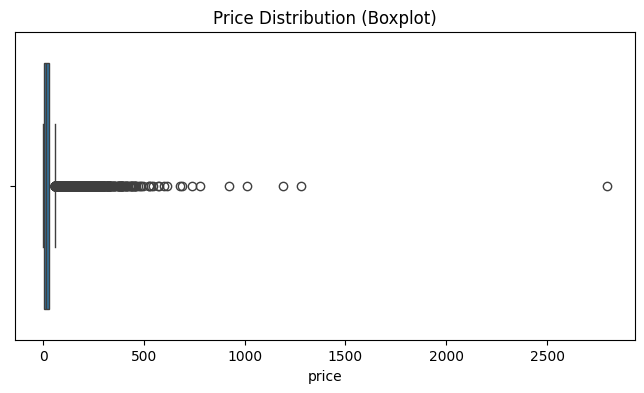

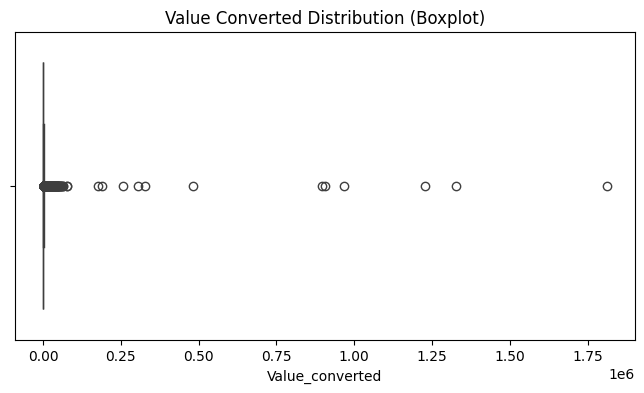

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=final_reg_df['price'])
plt.title('Price Distribution (Boxplot)')
plt.show()

# Value_converted boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=final_reg_df['Value_converted'])
plt.title('Value Converted Distribution (Boxplot)')
plt.show()

In [23]:
from scipy import stats

z_scores = stats.zscore(final_reg_df[['price', 'Value_converted']], nan_policy='omit')
abs_z = np.abs(z_scores)

# Consider points with z > 3 as outliers
outliers = (abs_z > 3).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")

# View outlier rows
final_reg_df[outliers]

Number of outliers: 1256


,sample_id,price,Value,Unit,full_text,Unit_normalized,Value_converted,Unit_type
38,196576,124.52,12.0,Ounce,"Buchu Leaf (Organic) Tea (Loose) (4 oz, ZIN: 5...",oz,340.1940,weight
86,202254,298.00,1.0,Ounce,"Tory Burch Coco Ginger Shortbread Sandal 9, Pi...",oz,28.3495,weight
89,3294,213.26,24.0,Count,"Mariani, Mediterranean Apricots (Pack of 24) ...",count,24.0000,count
222,195629,225.55,12.0,Ounce,"White Monkey Paw Tea (Loose) (4 oz, ZIN: 51061...",oz,340.1940,weight
246,212009,145.99,24.0,Ounce,Generic R.ao's Arrabbiata Sauce 24 oz (Pack of...,oz,680.3880,weight
...,...,...,...,...,...,...,...,...
74720,148814,128.44,24.0,Ounce,"Almond Vanilla Decaf Black Tea (Loose) (8 oz, ...",oz,680.3880,weight
74734,46415,267.99,250.0,Count,GlobalRose 250 Fresh Cut Pink Roses - Long Ste...,count,250.0000,count
74791,161047,165.36,6.0,Count,Lawrys Salt Free 17 Seasoning - 20 oz. contain...,count,6.0000,count
74878,125690,215.99,1.0,Count,"Star Anise by Its Delish, (10 lbs) PREMIUM Who...",count,1.0000,count


In [24]:
import numpy as np

final_reg_df['price_log'] = np.log1p(final_reg_df['price'])
final_reg_df['Value_converted_log'] = np.log1p(final_reg_df['Value_converted'])

/tmp/ipython-input-2092609445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_reg_df['price_log'] = np.log1p(final_reg_df['price'])
/tmp/ipython-input-2092609445.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_reg_df['Value_converted_log'] = np.log1p(final_reg_df['Value_converted'])


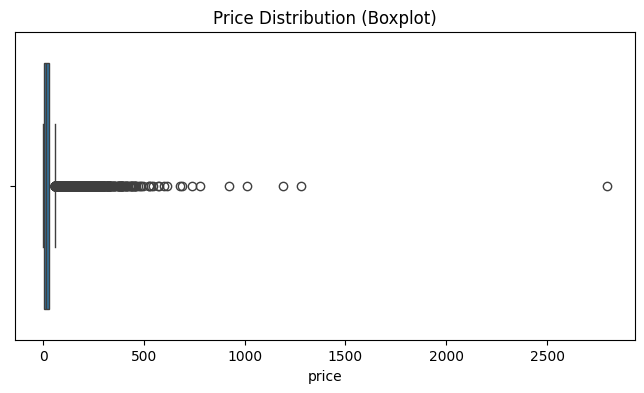

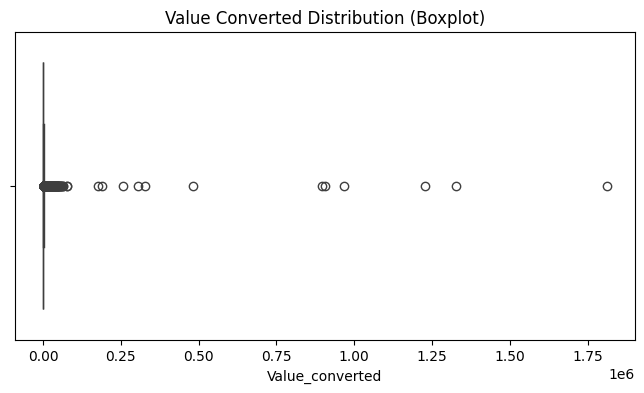

In [25]:
# Price boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=final_reg_df['price'])
plt.title('Price Distribution (Boxplot)')
plt.show()

# Value_converted boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=final_reg_df['Value_converted'])
plt.title('Value Converted Distribution (Boxplot)')
plt.show()

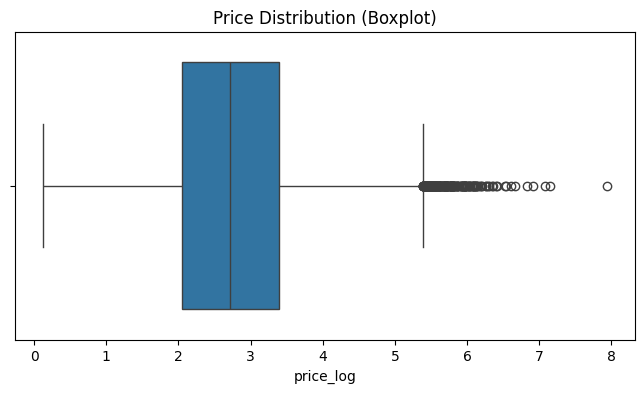

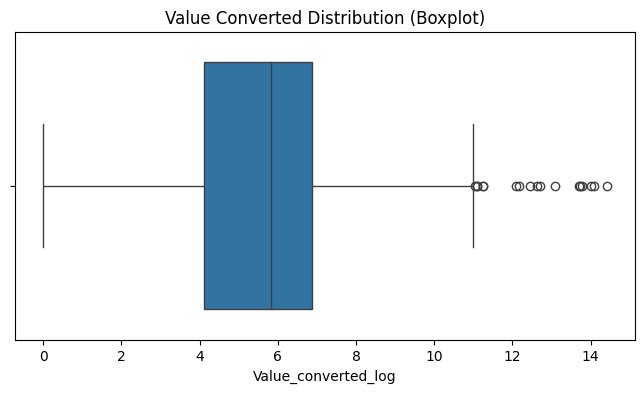

In [26]:
# Price boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=final_reg_df['price_log'])
plt.title('Price Distribution (Boxplot)')
plt.show()

# Value_converted boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=final_reg_df['Value_converted_log'])
plt.title('Value Converted Distribution (Boxplot)')
plt.show()

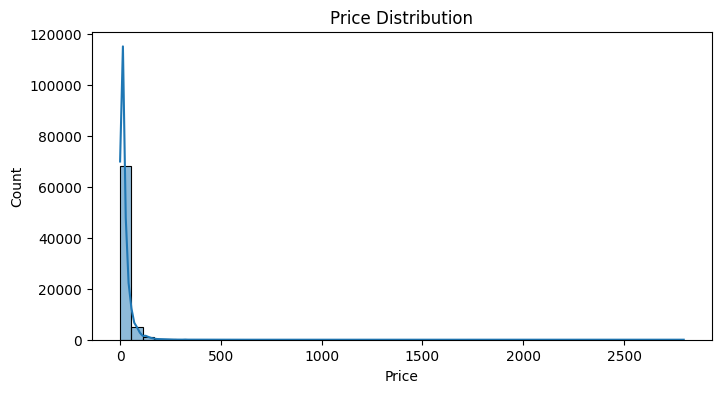

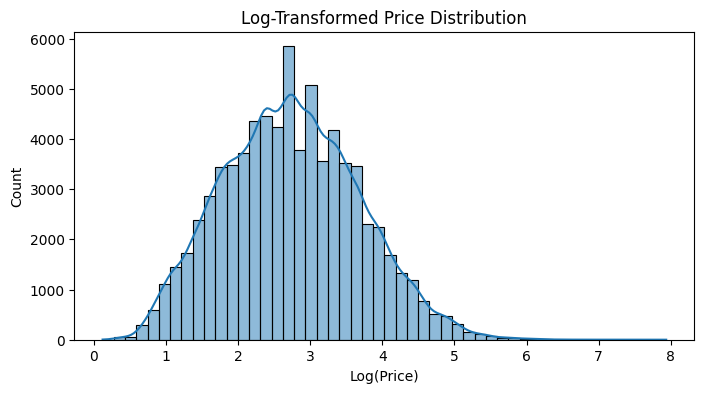

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original price
plt.figure(figsize=(8,4))
sns.histplot(final_reg_df['price'], kde=True, bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

# Log-transformed price
plt.figure(figsize=(8,4))
sns.histplot(final_reg_df['price_log'], kde=True, bins=50)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.show()

In [28]:
from scipy.stats import skew

skew_value = skew(final_reg_df['price_log'].dropna())
print(f"Skew of log(price): {skew_value:.4f}")

if skew_value > 0:
    print("Right-skewed (long tail on the right)")
elif skew_value < 0:
    print("Left-skewed (long tail on the left)")
else:
    print("Approximately symmetric")

Skew of log(price): 0.2039
Right-skewed (long tail on the right)


In [29]:
final_reg_df.head()

,sample_id,price,Value,Unit,full_text,Unit_normalized,Value_converted,Unit_type,price_log,Value_converted_log
0,33127,4.89,72.00,Fl Oz,"La Victoria Green Taco Sauce Mild, 12 Ounce (P...",oz,2041.164000,weight,1.773256,7.621765
1,198967,13.12,32.00,Ounce,"Salerno Cookies, The Original Butter Cookies, ...",oz,907.184000,weight,2.647592,6.811447
2,261251,1.97,11.40,Ounce,"Bear Creek Hearty Soup Bowl, Creamy Chicken wi...",oz,323.184300,weight,1.088562,5.781312
3,55858,30.34,11.25,Ounce,Judee’s Blue Cheese Powder 11.25 oz - Gluten-F...,oz,318.931875,weight,3.444895,5.768108
4,292686,66.49,12.00,Count,"kedem Sherry Cooking Wine, 12.7 Ounce - 12 per...",count,12.000000,count,4.211979,2.564949


In [30]:
from sentence_transformers import SentenceTransformer

In [31]:
model = SentenceTransformer('all-mpnet-base-v2')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [32]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device count:", torch.cuda.device_count())
print("GPU name:", torch.cuda.get_device_name(0))

CUDA available: True
Device count: 1
GPU name: Tesla T4


In [33]:
# Convert text to embeddings
X_text_embed = model.encode(
    final_reg_df['full_text'].tolist(),  # list of product descriptions
    batch_size=128,                      # adjust based on RAM/GPU
    show_progress_bar=True
)

# Convert to numpy array
X_text_embed = np.array(X_text_embed)
print("Shape of text embeddings:", X_text_embed.shape)

Batches:   0%|          | 0/586 [00:00<?, ?it/s]

Shape of text embeddings: (75000, 768)


In [34]:
numeric_features = final_reg_df[['Value_converted_log']].fillna(0).values
X_final = np.hstack([X_text_embed, numeric_features])
print("Final feature matrix shape:", X_final.shape)

Final feature matrix shape: (75000, 769)


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
y = np.array(final_reg_df['price_log'])

In [37]:
import numpy as np
# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y,
    test_size=0.2,

    random_state=42
)

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (60000, 769)
X_test: (15000, 769)
y_train: (60000,)
y_test: (15000,)


In [56]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Create dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Train model
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'device': 'gpu',           # GPU acceleration
    'learning_rate': 0.05,
    'num_leaves': 127,
    'max_depth': 12,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'verbose': -1
}

model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    num_boost_round=1000

)

# Predict
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # convert back to original price

In [57]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Convert back to original price
y_true = np.expm1(y_test)

# Compute metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 33.99
MAE: 12.45
R² Score: 0.2347


In [58]:
def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

In [59]:
smape_score = smape(y_true, y_pred)
print(f"SMAPE: {smape_score:.2f}%")

SMAPE: 54.72%


In [60]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train Ridge Regression on log-price
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_log = ridge.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

rmse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")

RMSE: 1372.55, MAE: 14.52, R²: 0.0905


In [62]:
smape_score = smape(y_true, y_pred)
print(f"SMAPE: {smape_score:.2f}%")

SMAPE: 62.53%


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

input_dim = X_train.shape[1]

model = Sequential([
    Dense(512, activation='relu', input_dim=input_dim), //best model
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dense(1)  # log-price prediction
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=128)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.0786 - val_loss: 0.6654
Epoch 2/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5848 - val_loss: 0.6000
Epoch 3/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5360 - val_loss: 0.5928
Epoch 4/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4889 - val_loss: 0.5725
Epoch 5/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4665 - val_loss: 0.5635
Epoch 6/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4314 - val_loss: 0.5650
Epoch 7/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4118 - val_loss: 0.5564
Epoch 8/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3948 - val_loss: 0.5452
Epoch 9/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3751 - val_loss: 0.5629
Epoch 10/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3572 - val_loss: 0.5505
Epoch 11/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3437 - val_loss: 0.5547
Epoch 12/200
422/422 ━━━━━━━━━━━━━━━━━━━━

In [64]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1️⃣ Predict log(price)
y_pred_log = model.predict(X_test).flatten()

# 2️⃣ Convert back to actual price
y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test)

# 3️⃣ Compute metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# 4️⃣ SMAPE
def smape(y_true, y_pred):
    return 100 * np.mean(
        np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2)
    )

smape_val = smape(y_true, y_pred)

# 5️⃣ Print results
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"SMAPE: {smape_val:.2f}%")

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE: 33.81
MAE: 12.30
R² Score: 0.2427
SMAPE: 49.49%


In [84]:
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='tanh', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(256, activation='tanh'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss=Huber(delta=1.0))
model.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=128)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.8222 - val_loss: 0.3698
Epoch 2/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3157 - val_loss: 0.3241
Epoch 3/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2638 - val_loss: 0.2950
Epoch 4/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2353 - val_loss: 0.2940
Epoch 5/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2164 - val_loss: 0.2798
Epoch 6/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2020 - val_loss: 0.2895
Epoch 7/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1902 - val_loss: 0.2737
Epoch 8/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1767 - val_loss: 0.2744
Epoch 9/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1688 - val_loss: 0.2716
Epoch 10/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1608 - val_loss: 0.2720
Epoch 11/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1539 - val_loss: 0.2747
Epoch 12/200
422/422 ━━━━━━━━━━━━━━━━━━━━

In [85]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1️⃣ Predict log(price)
y_pred_log = model.predict(X_test).flatten()

# 2️⃣ Convert back to actual price
y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test)

# 3️⃣ Compute metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# 4️⃣ SMAPE
def smape(y_true, y_pred):
    return 100 * np.mean(
        np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2)
    )

smape_val = smape(y_true, y_pred)

# 5️⃣ Print results
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"SMAPE: {smape_val:.2f}%")

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE: 34.39
MAE: 13.68
R² Score: 0.2165
SMAPE: 54.13%


In [66]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

def build_model(input_dim):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
    model = Sequential([
        Dense(512, activation='relu', kernel_regularizer=l2(1e-4), input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.4),
        Dense(256, activation='relu', kernel_regularizer=l2(1e-4)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1)
    ])
    return model

model = build_model(X_train.shape[1])
model.compile(optimizer='adam', loss=Huber(delta=1.0))

In [67]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_list = []

for train_idx, val_idx in kf.split(X_final):
    X_tr, X_val = X_final[train_idx], X_final[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]
    model_cv = build_model(X_tr.shape[1])
    model_cv.compile(optimizer='adam', loss=Huber(delta=1.0))
    model_cv.fit(X_tr, y_tr, validation_data=(X_val, y_val), epochs=20, batch_size=128, verbose=0)
    y_val_pred = np.expm1(model_cv.predict(X_val).flatten())
    y_val_true = np.expm1(y_val)
    rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))
    rmse_list.append(rmse)

print("CV RMSE mean:", np.mean(rmse_list), "std:", np.std(rmse_list))

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CV RMSE mean: 28.85938830682552 std: 3.206669715371368


In [69]:
smape_val = smape(y_val_true,y_val_pred)

In [71]:
print(smape_val)

56.45123501440469


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.4769 - val_loss: 0.2871
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2722 - val_loss: 0.2817
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2458 - val_loss: 0.2870
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2315 - val_loss: 0.2711
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2189 - val_loss: 0.2634
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2101 - val_loss: 0.2484
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1980 - val_loss: 0.2505
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1916 - val_loss: 0.2467
Epoch 9/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1857 - val_loss: 0.2548
Epoch 10/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1783 - val_loss: 0.2418
Epoch 11/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1722 - val_loss: 0.2625
Epoch 12/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

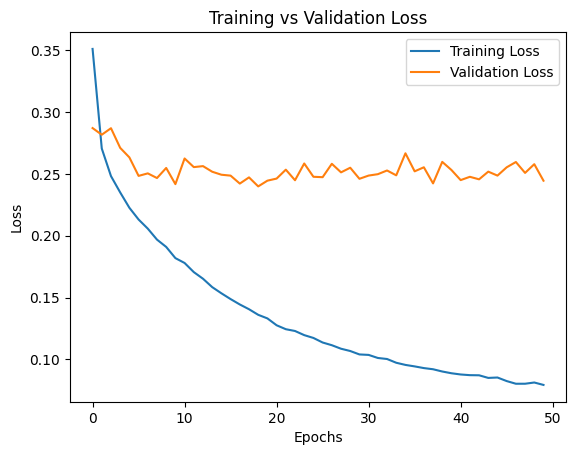

In [72]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

# -----------------------------
# 1️⃣ Define Model Architecture
# -----------------------------
input_dim = X_train.shape[1]

model = Sequential([
    Dense(512, input_dim=input_dim),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(256),
    LeakyReLU(alpha=0.1),
    Dense(1)   # Predict log(price)
])

# -----------------------------
# 2️⃣ Compile Model
# -----------------------------
model.compile(optimizer=Adam(learning_rate=0.001), loss=Huber())

# -----------------------------
# 3️⃣ Train Model
# -----------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=128,
    verbose=1
)

# -----------------------------
# 4️⃣ Make Predictions
# -----------------------------
y_pred_log = model.predict(X_test).flatten()

# Exponentiate if your target was log-transformed
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# -----------------------------
# 5️⃣ Evaluation Metrics
# -----------------------------
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# SMAPE Calculation
smape = np.mean(
    np.abs(y_pred - y_true) / ((np.abs(y_true) + np.abs(y_pred)) / 2)
) * 100

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ R² Score: {r2:.4f}")
print(f"✅ SMAPE: {smape:.2f}%")

# -----------------------------
# 6️⃣ Optional: Plot training curve
# -----------------------------
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.4110 - val_loss: 0.2922
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2716 - val_loss: 0.2726
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2438 - val_loss: 0.2694
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2307 - val_loss: 0.2618
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2174 - val_loss: 0.2680
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2064 - val_loss: 0.2549
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1978 - val_loss: 0.2485
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1893 - val_loss: 0.2416
Epoch 9/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1841 - val_loss: 0.2403
Epoch 10/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1764 - val_loss: 0.2444
Epoch 11/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1705 - val_loss: 0.2460
Epoch 12/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

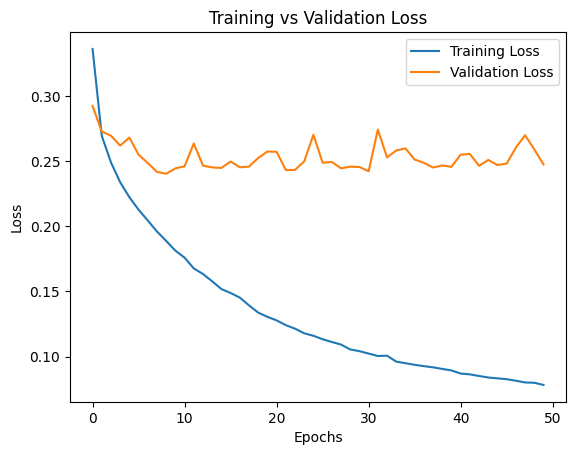

In [73]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

# -----------------------------
# 1️⃣ Define Model Architecture
# -----------------------------
input_dim = X_train.shape[1]

model = Sequential([
    Dense(512, input_dim=input_dim),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(256),
    LeakyReLU(alpha=0.1),
    Dense(1)   # Predict log(price)
])

# -----------------------------
# 2️⃣ Compile Model
# -----------------------------
model.compile(optimizer=Adam(learning_rate=0.001), loss=Huber())

# -----------------------------
# 3️⃣ Train Model
# -----------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=128,
    verbose=1
)

# -----------------------------
# 4️⃣ Make Predictions
# -----------------------------
y_pred_log = model.predict(X_test).flatten()

# Exponentiate if your target was log-transformed
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# -----------------------------
# 5️⃣ Evaluation Metrics
# -----------------------------
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# SMAPE Calculation
smape = np.mean(
    np.abs(y_pred - y_true) / ((np.abs(y_true) + np.abs(y_pred)) / 2)
) * 100

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ R² Score: {r2:.4f}")
print(f"✅ SMAPE: {smape:.2f}%")

# -----------------------------
# 6️⃣ Optional: Plot training curve
# -----------------------------
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [74]:
import numpy as np
from scipy.stats import zscore

# Assuming 'price_log' exists in final_reg_df
z_scores = np.abs(zscore(final_reg_df['price_log']))

# Identify outliers (|Z| > 3 is typical)
outliers = final_reg_df[z_scores > 3]
num_outliers = outliers.shape[0]

print(f"Total outliers in 'price_log': {num_outliers}")
print(outliers[['price_log', 'price']].head(10))  # preview first 10 outliers

Total outliers in 'price_log': 139
      price_log   price
86     5.700444  298.00
783    5.741945  310.67
988    5.825026  337.67
2059   5.604662  270.69
2218   5.797880  328.60
2320   5.584135  265.17
2569   6.072998  432.98
2724   5.771441  320.00
2818   6.003986  404.04
3157   5.772842  320.45


In [75]:
import tensorflow as tf

def smape_loss(y_true, y_pred):
    epsilon = 1e-6
    numerator = tf.abs(y_pred - y_true)
    denominator = (tf.abs(y_true) + tf.abs(y_pred) + epsilon) / 2.0
    return tf.reduce_mean(numerator / denominator) * 100.0

def hybrid_loss(y_true, y_pred):
    huber = tf.keras.losses.Huber()(y_true, y_pred)
    smape = smape_loss(y_true, y_pred)
    return 0.5 * huber + 0.5 * smape

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam

def build_nn(input_dim):
    model = Sequential([
        Dense(1024, input_dim=input_dim),
        BatchNormalization(),
        LeakyReLU(alpha=0.1),
        Dropout(0.4),
        Dense(512),
        BatchNormalization(),
        LeakyReLU(alpha=0.1),
        Dropout(0.3),
        Dense(256),
        BatchNormalization(),
        LeakyReLU(alpha=0.1),
        Dense(1)  # Predict log(price)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss=hybrid_loss)
    return model

nn_model = build_nn(X_train.shape[1])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [77]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

history = nn_model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=128,
    callbacks=[es, rlr],
    verbose=1
)

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 27.5099 - val_loss: 12.7974 - learning_rate: 0.0010
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 12.6636 - val_loss: 12.2834 - learning_rate: 0.0010
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 12.1472 - val_loss: 11.9205 - learning_rate: 0.0010
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.8594 - val_loss: 11.8365 - learning_rate: 0.0010
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.6708 - val_loss: 12.0358 - learning_rate: 0.0010
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 11.4724 - val_loss: 11.5734 - learning_rate: 0.0010
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.2660 - val_loss: 11.9259 - learning_rate: 0.0010
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.0740 - val_loss: 11.3212 - learning_rate: 0.0010
Epoch 9/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.9742 - val_loss: 11.6348 - lear

In [81]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'verbose': -1,
    'n_estimators': 1000,
    'device': 'gpu',  # use GPU
}

lgb_model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_eval]

)

In [82]:
# Neural Network predictions (log scale)
nn_pred_log = nn_model.predict(X_test).flatten()
nn_pred = np.expm1(nn_pred_log)  # convert back to original price

# LightGBM predictions (assume trained on log(price) too)
lgb_pred_log = lgb_model.predict(X_test)
lgb_pred = np.expm1(lgb_pred_log)

# Ensemble: simple average
final_pred = 0.5 * nn_pred + 0.5 * lgb_pred

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_true = np.expm1(y_test)  # original prices

# Standard metrics
rmse = np.sqrt(mean_squared_error(y_true, final_pred))
mae = mean_absolute_error(y_true, final_pred)
r2 = r2_score(y_true, final_pred)

# SMAPE
smape = np.mean(np.abs(final_pred - y_true) / ((np.abs(y_true) + np.abs(final_pred)) / 2)) * 100

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ R² Score: {r2:.4f}")
print(f"✅ SMAPE: {smape:.2f}%")

✅ RMSE: 33.52
✅ MAE: 12.07
✅ R² Score: 0.2556
✅ SMAPE: 52.91%
